In [6]:
import cv2
import numpy as np
import shutil
from matplotlib import pyplot as plt
import os
from IPython.display import Image
import re


### Agrega a un folder llamado "images" las imagenes que quieras procesar

In [7]:
if not os.path.exists('imagenes'):
    os.makedirs('imagenes')
if not os.path.exists('resultados'):
    os.makedirs('resultados')

In [8]:
images = []
for filename in os.listdir('/content/imagenes'):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        images.append(os.path.join('/content/imagenes', filename))

for file in images:
    img = cv2.imread(file)

    if img is None:
        print(f"Error al cargar la imagen: {file}")
    else:
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Step 1: Gaussian Blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Step 2: Bilateral Filter
        bilateral_filtered = cv2.bilateralFilter(blurred, 5, 50, 50)

        # Step 3: Edge Detection using Canny
        edges = cv2.Canny(bilateral_filtered, threshold1=30, threshold2=100)

        # Step 4: Thresholding with Otsu
        _, binary_mask = cv2.threshold(bilateral_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Step 5: Morphological Transformations (Closing)
        kernel = np.ones((5, 5), np.uint8)
        morphed = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

        # Step 6: Erosion
        eroded_mask = cv2.erode(morphed, kernel, iterations=1)

        # Step 7: Median Filtering
        median_filtered = cv2.medianBlur(eroded_mask, 19)

        # Step 8: Laplacian of Gaussian (LoG)
        laplacian_kernel = np.array([[-1, -1, -1],
                                     [-1,  8, -1],
                                     [-1, -1, -1]])
        gaussian_kernel = np.array([[1, 2, 1],
                                    [2, 4, 2],
                                    [1, 2, 1]]) / 16
        log_blurred = cv2.filter2D(bilateral_filtered, -1, laplacian_kernel)
        log_blurred = cv2.filter2D(log_blurred, -1, gaussian_kernel)

        # Scale LoG for visualization
        log_blurred_scaled = (log_blurred * 255).astype(np.uint8)

        # Step 9: Dilation
        dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

        # Save results
        result_path = 'resultados/' + os.path.basename(file)[:-4] + '/'
        os.makedirs(result_path, exist_ok=True)

        cv2.imwrite(result_path + '1_gray.png', gray)
        cv2.imwrite(result_path + '2_bilateral_filtered.png', bilateral_filtered)
        cv2.imwrite(result_path + '3_binary_mask.png', binary_mask)
        cv2.imwrite(result_path + '4_eroded_mask.png', eroded_mask)
        cv2.imwrite(result_path + '5_dilated_mask.png', dilated_mask)

resultados/35f892c1-da41-4a26-afbf-cb846cdf7436_B2_03_06_Best/


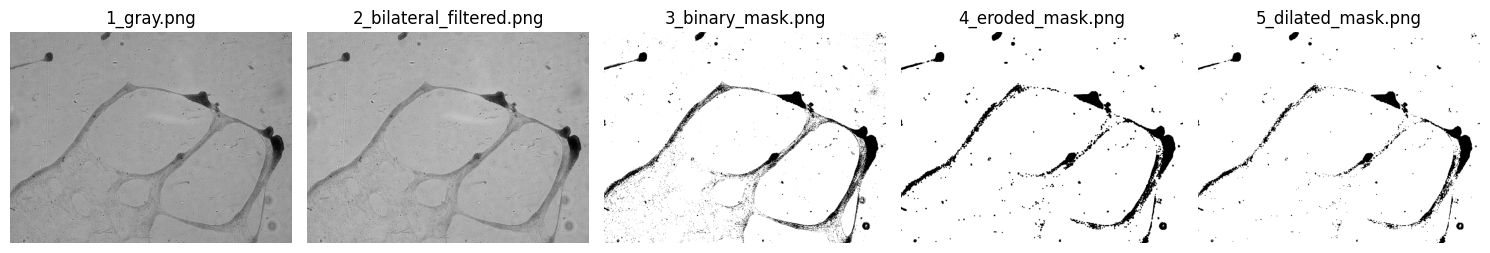

resultados/35f892c1-da41-4a26-afbf-cb846cdf7436_B2_02_04_Best/


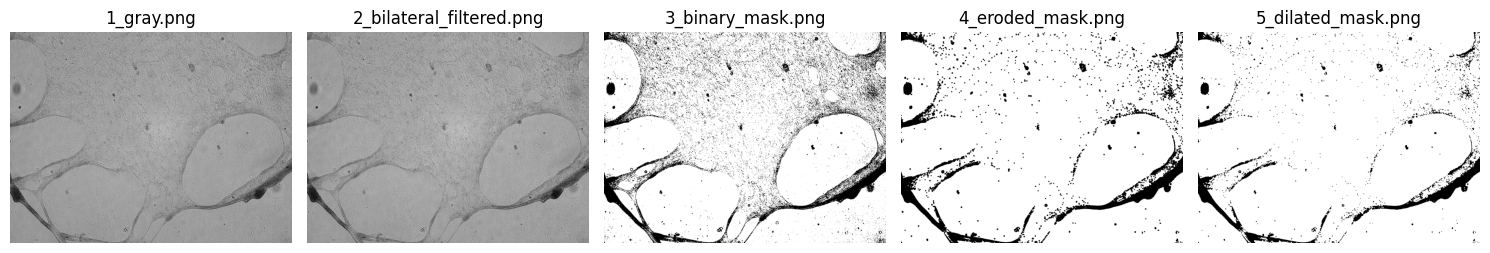

resultados/35f892c1-da41-4a26-afbf-cb846cdf7436_B2_03_05_Best/


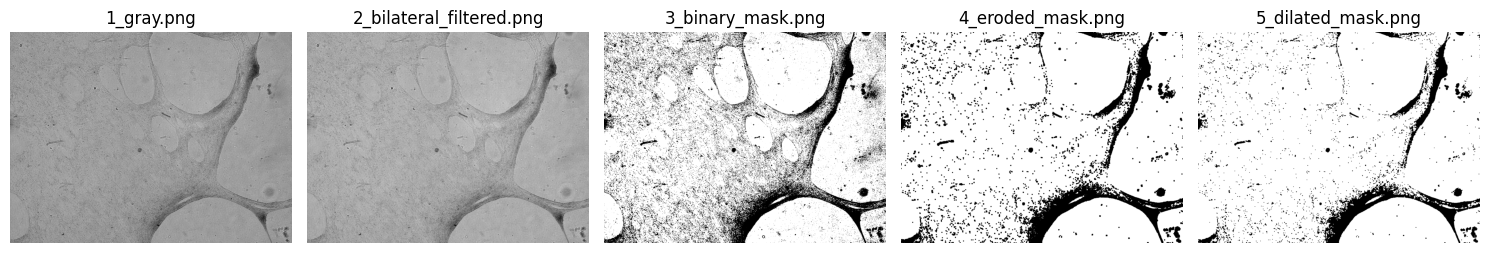

In [9]:
for file in images:
    result_path = 'resultados/' + os.path.basename(file)[:-4] + '/'
    print(result_path)

    # Display results from the result_path folder
    image_files = [f for f in os.listdir(result_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort(key=lambda filename: int(re.search(r'\d+', filename).group()))

    num_images = len(image_files)
    num_cols = min(num_images, 5)
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, image_file in enumerate(image_files):
        img_path = os.path.join(result_path, image_file)
        img = plt.imread(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(image_file)
        axes[i].axis('off')

    for i in range(len(image_files), len(axes)):
        axes[i].axis('off')
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

In [10]:
for file in os.listdir('/content/results'):
    file_path = os.path.join('/content/results', file)
    if os.path.isfile(file_path):
        os.remove(file_path)
    elif os.path.isdir(file_path):
        shutil.rmtree(file_path)